# Histogram fitting

## Example 01

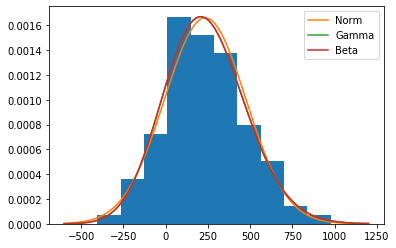

In [17]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# 產生隨機的事件
# np.random.rand() 產生 0~1 之間的隨機數
# np.random.normal(mu, sigma, N)
y = 50 * np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
# plt.hist(y, normed=True) # normed 是舊的方式，新的要改用 density
plt.hist(y, density=True)

# 找 xticks 最大跟最小值, 這樣才知道分布的範圍
xt = plt.xticks()[0]
xmin, xmax = min(xt), max(xt)
lnspc = np.linspace(xmin, xmax, len(y)) # np.linspace(起點, 終點, 包含起點到終點共幾個點)

# normal distribution
m, s = stats.norm.fit(y) # mean, std
pdf_g = stats.norm.pdf(lnspc, m, s) # 用 fit 到的參數求出的函數值，lnspc 就是 x 的值組成的 list
plt.plot(lnspc, pdf_g, label='Norm') # 畫出 fit 到的曲線

# gamma distribution
ag, bg, cg = stats.gamma.fit(y)
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg, cg)
plt.plot(lnspc, pdf_gamma, label='Gamma')

# beta distribution
ab, bb, cb, db = stats.beta.fit(y)
pdf_beta = stats.beta.pdf(lnspc, ab, bb, cb, db)
plt.plot(lnspc, pdf_beta, label='Beta')

plt.legend()
plt.show()

## Example 02

In [18]:
# 1. import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# 2. Define the fit function
def fit_func(x, A, beta, B, mu, sigma):
    return (A * np.exp(-x / beta) + B * np.exp(-1. * (x - mu)**2 / (2 * sigma**2)))

# 3. Get the data for fitting
# 用來 fitting 的數據可以是從實驗得到的，或是模擬產生的
# 這邊用模擬產生數據

# background
data = np.random.exponential(scale=2.0, size=100000)
# signal

data2 = np.random.normal(loc=3.0, scale=0.3, size=15000) # mu=3.0 sigma=0.3
bins = np.linspace(0, 6, 61) # 0 ~ 6 之間產生 61 個點，包含 0 與 6

# 得到 signal 和 background 的 histogram
# data_entries 是每個 bin 的高度 (就是 y)
# bins 是每個 bin 的數值 (就是 x)
data_entries_1, bins_1 = np.histogram(data, bins=bins)
data_entries_2, bins_2 = np.histogram(data2, bins=bins)

# 把 signal 和 background 的 histogram 加起來
data_entries = data_entries_1 + data_entries_2

# 計算 bin 的中心值, fitting 時的 x 值用這個帶入
bins_centers = np.array([0.5 * (bins[i] + bins[i + 1]) for i in range(len(bins) - 1)])

# 4. Fit the function to the histogram
# fitting function 用名字傳入
# 把要 fit 的 x, y 值都傳入
# 初始的參數值也可以傳入
# fitting 後傳回參數列表 (popt) 和 covariance matrix (pcov)
# covariance matrix 對角線元素表示 fitted 參數的 variance
popt, pcov = curve_fit(fit_func, xdata=bins_centers, ydata=data_entries, p0=[20000, 2.0, 2000, 3.0, 0.3])

print(popt)
print(pcov)

[4.99901529e+03 2.00492770e+00 1.98312576e+03 3.00311463e+00
 3.00036239e-01]
[[ 4.03035594e+02 -2.03716556e-01  6.01833404e+01  2.33902635e-03
   1.53092631e-02]
 [-2.03716556e-01  2.01624659e-04 -8.93759204e-02  5.11317721e-07
  -2.50182658e-05]
 [ 6.01833404e+01 -8.93759204e-02  5.52084139e+02 -6.62801557e-04
  -3.86119223e-02]
 [ 2.33902635e-03  5.11317721e-07 -6.62801557e-04  1.55425334e-05
  -2.07797862e-07]
 [ 1.53092631e-02 -2.50182658e-05 -3.86119223e-02 -2.07797862e-07
   1.91081387e-05]]


## Example 03

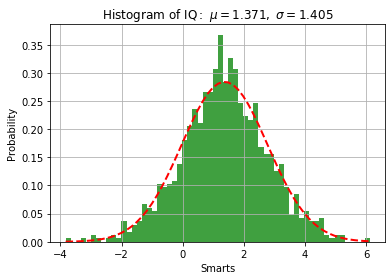

In [19]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

# 產生數據
y = np.random.normal(1.35, 1.43, 1000) # mu=1.35, sigma=1.43, N=1000

# fit data
(mu, sigma) = norm.fit(y)

# histogram
# n, bins, patches = plt.hist(y, 60, normed=True, facecolor='green', alpha=0.75) # normed 過時了, 要用 density
n, bins, patches = plt.hist(y, 60, density=True, facecolor='green', alpha=0.75)
# n 是 histogram 每個 bin 的高度
# bins 是每個 bin 的值

# 用 fit 到的參數來畫出理論的曲線
pdf_fitted = norm.pdf(bins, mu, sigma)
plt.plot(bins, pdf_fitted, 'r--', linewidth=2)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' % (mu, sigma))
plt.grid(True)

plt.show()

## Example 04

In [20]:
from pylab import *
from numpy import loadtxt
from scipy.optimize import leastsq

fit_func = lambda p, x: p[0] * exp(-0.5*((x - p[1])/p[2])**2) + p[3]
err_func = lambda p, x, y: (y - fit_func(p, x))

filename = 'gaussdata.csv'
data = loadtxt(filename, skiprows=1, delimiter=',')
xdata = data[:, 0]
ydata = data[:, 1]
# xdata = np.linspace(0, 10, 101)
# ydata = np.random.normal(5, 0.8, len(xdata))
# print(xdata)
# print(ydata)

init = [1.0, 0.5, 0.5, 0.5]

out = leastsq(err_func, init, args=(xdata, ydata))
c = out[0]

print('A exp[-0.5((x-mu)/sigma)^2] + k')
print('Parent Coefficients:')
print('1.000, 0.200, 0.300, 0.625')
print('Fit Coefficients:')
print(c[0], c[1], abs(c[2]), c[3])

plot(xdata, fit_func(c, xdata), label='fit func')
plot(xdata, ydata, label='data')

title(r'$A = %.3f\ \mu = %.3f\ \sigma = %.3f\ k = %.3f $' % (c[0], c[1], abs(c[2]), c[3]))

show()

OSError: gaussdata.csv not found.

## Example 05

(25.25662194540385, -148.14148261627696, 4623.922030127895)
(6.428644468789526, 2.066679663833713, -2.1803875753589317, 49.38511965325144)
(0.8064908652684404, 46.19350913473156)
(47.65242957705684, -227.48510032228666, 265.8190179256977)
(0.3815365645167335, 47.00000000000001, 1.4092601708989543)
(4.998157482492749, 21.897894917536505)


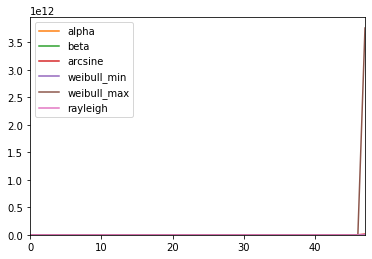

In [21]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats # import scipy 時不會包含 stats，所以還要自己 import 進來

size = 20000
x = scipy.arange(size)
# 用 beta distribution 產生 y 值
y = scipy.int_(scipy.round_(scipy.stats.beta.rvs(6, 2, size=size) * 47))
# creating the histogram
h = plt.hist(y, bins=range(48))

dist_names = ['alpha', 'beta', 'arcsine', 'weibull_min', 'weibull_max', 'rayleigh']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name) # 傳回 scipy.stats.dist_name 的屬性 dist_name 必須要是 string
    param = dist.fit(y)
    print(param)
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1]) * size # pdf 畫的是 normalized 的，所以要乘上 size 變成原本的大小
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0, 47)

plt.legend(loc='upper left')
plt.show()

## Example 06

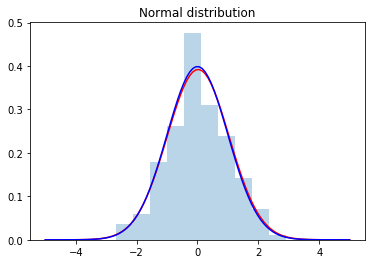

In [22]:
from scipy.stats import norm
from numpy import linspace
from pylab import plot, show, hist, figure, title

# 依照 normal distribution 產生 150 個數據點
# mean=0, standard deviation=1
sample = norm.rvs(loc=0, scale=1, size=150)

# fitting
param = norm.fit(sample)
# mu = param[0], sigma = param[1]

x = linspace(-5, 5, 100) # -5 到 5 產生 100 個點，包含 -5 和 5
# fitted distribution
pdf_fitted = norm.pdf(x, loc=param[0], scale=param[1])
# original distribution
pdf = norm.pdf(x)

title('Normal distribution')
plot(x, pdf_fitted, 'r-', x, pdf, 'b-')
# hist(sample, normed=1, alpha=.3)
hist(sample, density=1, alpha=.3)

show()

## Example 07

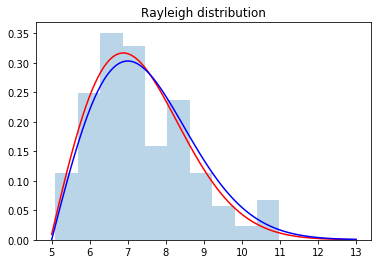

In [23]:
from scipy.stats import norm, rayleigh
from numpy import linspace
from pylab import plot, show, hist, figure, title

# 依照 rayleigh 分布產生數據
y = rayleigh.rvs(loc=5, scale=2, size=150)
# fitting
param = rayleigh.fit(y)
# 畫圖
x = linspace(5, 13, 100)
# fitted distribution
pdf_fitted = rayleigh.pdf(x, loc=param[0], scale=param[1])
# original distribution
pdf = rayleigh.pdf(x, loc=5, scale=2)

title('Rayleigh distribution')
plot(x, pdf_fitted, 'r-', x, pdf, 'b-')
# hist(y, normed=1, alpha=.3)
hist(y, density=1, alpha=.3)
show()

## Example 08

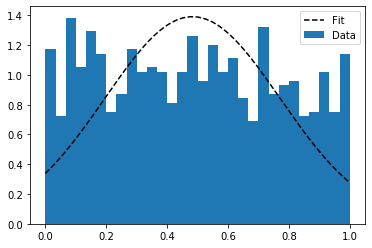

In [24]:
import numpy as np
from matplotlib import pyplot as plt

N = 1000
data = np.random.rand(N) # 0~1 之間產生 N 個隨機數

avg = np.mean(data)
var = np.var(data)

pdf_x = np.linspace(np.min(data), np.max(data), 1000)
pdf_y = 1.0 / np.sqrt(2 * np.pi * var) * np.exp(-0.5 * (pdf_x - avg)**2 / var) # 用 x 值帶入 gaussian function 求 y，所以這不算 fitting

plt.figure()
# plt.hist(data, 30, normed=True)
plt.hist(data, 30, density=True)
plt.plot(pdf_x, pdf_y, 'k--')
plt.legend(['Fit', 'Data'], loc='best')
plt.show()

## Example 09

AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

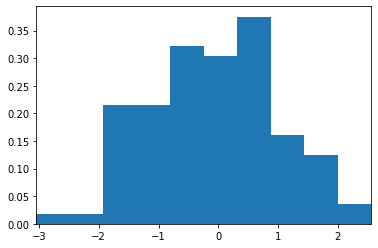

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

arr = np.random.randn(100)

plt.figure(1)
# plt.hist(arr, normed=True)
plt.hist(arr, density=True)
plt.xlim((min(arr), max(arr)))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)

x = np.linspace(min(arr), max(arr), 100)

plt.plot(x, mlab.normpdf(x, mean, sigma))
plt.show()

## Example 10

AttributeError: module 'matplotlib.mlab' has no attribute 'normpdf'

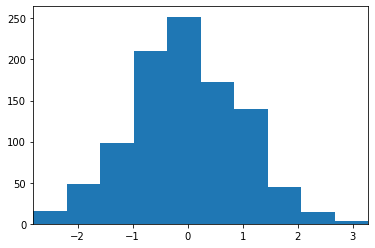

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab

arr = np.random.randn(1000)

plt.figure(1)
result = plt.hist(arr) # result 包含了 entities, bins, patches
plt.xlim(min(arr), max(arr))

mean = np.mean(arr)
variance = np.var(arr)
sigma = np.sqrt(variance)

x = np.linspace(min(arr), max(arr), 100)
dx = result[1][1] - result[1][0] # result[1] 就是 bins
scale = len(arr) * dx # arr 的元素數目是固定的，當填入 histogram 時 dx 越大 bar 就越高
plt.plot(x, mlab.normpdf(x, mean, sigma) * scale) # 乘以 scale 相當於乘以面積

plt.show()

## Example 11

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.misc import factorial


# get poisson deviated random numbers
data = np.random.poisson(2, 1000)
print(type(data))

# the bins should be of integer width, because poisson is an integer distribution
# entries, bin_edges, patches = plt.hist(data, bins=11, range=[-0.5, 10.5], normed=True)
entries, bin_edges, patches = plt.hist(data, bins=11, range=[-0.5, 10.5], density=True)

# calculate binmiddles
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1]) # 計算 bin 的中心值，當成 x 值

# poisson function, parameter lamb is the fit parameter
def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)

# fit with curve_fit
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries) # curve_fit(要用來 fitting 的函數, x 值, y 值)

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, 20, 1000)

plt.plot(x_plot, poisson(x_plot, *parameters), 'r-', lw=2)
plt.show()

ImportError: cannot import name 'factorial'

## SciPy skewnormal fitting

6.679125627647837 -0.15955820296665763 2.2759554015177628


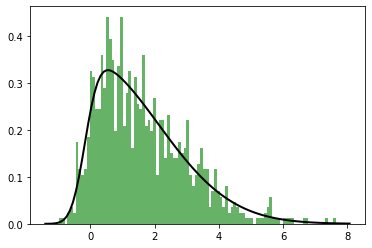

In [28]:
# https://stackoverflow.com/questions/50140371/scipy-skewnormal-fitting

from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# choose some parameters
a, loc, scale = 5.3, -0.1, 2.2

# draw a sample
data = stats.skewnorm(a, loc, scale).rvs(1000) # 產生 1000 個 skew normal 的隨機數

# estimate parameters from sample
ae, loce, scalee = stats.skewnorm.fit(data)
print(ae, loce, scalee)

# plot the pdf
plt.figure()
plt.hist(data, bins=100, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
y = stats.skewnorm.pdf(x, ae, loce, scalee)
plt.plot(x, y, 'k', linewidth=2)
plt.show()